<center><img src="img/Marca-ITBA-Color-ALTA.png" width="250">

<h1>Master en Management & Analytics</h1>
</center>

## Clase 3- Introducción a Machine Learning

#### Referencias y bibliografía de consulta:

- Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido (O’Reilly) 2017 - capítulos 1 y 2
- An Introduction to Statistical Learning with Applications in R by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani (Springer) 2017 - capítulos 2 y 3
- Python Machine Learning - Second Edition by Sebastian Raschka (Packt) 2017 - capítulo 1
- Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems - Aurélien Géron - 2017
- https://scikit-learn.org/


En esta clase vamos a empezar a ver **la metodología y los algoritmos de Machine Learning**.

Vamos a empezar estudiando los algoritmos de **aprendizaje supervisado** en particular usando el **modelo de regresión lineal**.


<img src="img/ml_metodology.png" width="500">
<center>Metodología de un algoritmo de aprendizaje supervisado</center>

<img src="img/House sale.jpg" width="400"  >

En la clase de hoy vamos a trabajar con el [dataset](https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/) de precios de venta de viviendas del King County. Incluye las viviendas vendidas entre mayo de 2014 y mayo de 2015.

Vamos a comenzar como de costumbre importando algunas de las librerías que vamos a necesitar.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


Creamos un DataFrame tomando el csv con los datos:

In [2]:
dataset = pd.read_csv('data/kc_house_data.csv')

dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Observemos las primeras 5 filas de nuestro `dataset`. 

Cada fila representa una casa.

Tenemos 21 atributos:
- **id**: identificación
- **date**: fecha de venta       
- **price**: precio de venta. Esta es nuestra `variable objetivo`.
- **bedrooms**: cantidad de habitaciones
- **bathrooms**: cantidad de baños
- **sqft_living**: tamaño de la zona habitable en pies cuadrados
- **sqft_lot**: tamaño del lote en pies cuadrados
- **floors**: cantidad de pisos
- **waterfront**: 1 si la propiedad tiene un frente de agua, 0 si no.
- **view**: un índice de 0 a 4 de lo buena que era la vista de la propiedad
- **condition**: estado de la casa, clasificado del 1 al 5
- **grade**: clasificación según la calidad de la construcción, que se refiere a los tipos de materiales utilizados y a la calidad de la mano de obra. Los edificios de mejor calidad (mayor grado) cuestan más de construir por unidad de medida y tienen mayor valor.
- **sqft_above**: Pies cuadrados sobre el suelo
- **sqft_basement**: Pies cuadrados bajo tierra
- **yr_built**: año de construcción
- **yr_renovated**: año de renovación. 0 si no se ha renovado nunca
- **zipcode**: código postal de 5 dígitos
- **lat**: latitud
- **long**: longitud
- **sqft_living15**: tamaño medio del espacio habitable de las 15 casas más cercanas, en pies cuadrados
- **sqft_lot15**: tamaño medio del lote de las 15 casas más cercanas, en pies cuadrados


Con el método `info()` obtenemos más detalles de cada atributo. 

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Hay 21.613 instancias en el dataset. No se observa presencia de datos nulos.

Vemos que el atributo `date` no está bien casteado como datetime. Lo vamos a corregir. Además, vamos a extraer el año de venta.

In [4]:
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['year_sold'] = dataset['date'].dt.year

Veamos las primeras 5 filas para confirmar que esté todo ok. 

In [5]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


Con el método `describe()` obtenemos un reporte estadístico de las variables numéricas.

Veamos el reporte estadístico para familiarizarnos con los datos y ver si detectamos alguna anomalía. 

In [6]:
dataset.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616


Vemos algunos valores que llaman la atención y que requieren que los investiguemos más a fondo:
- El máximo número de habitaciones es 33, lo que definitivamente parece mucho para una casa. Podría tratarse de un hotel que no debería formar parte del dataset o un error de carga. 
- El mínimo de habitaciones y baños es 0, lo que también resulta extraño. Habrá que ver en detalle esos casos también. 

Se podrían encontrar otras cuestiones que requieran ser analizadas en detalle. En un caso real, seguramente sería recomendable hacerlo. Para para fines de esta clase, abordemos estas 3 situaciones. 

Empecemos analizando el caso de las 33 habitaciones:

In [7]:
dataset[dataset['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,2014


Efectivamente se debe tratar de un error porque la cantidad de habitaciones no es consistente con `sqft_living` ni con la cantidad de baños. Se podría corregir este error de muchas maneras, por ejemplo buscando desarrollar un modelo que prediga la cantidad de habitaciones a partir de las otras features del dataset (imputación por regresión). Por simplicidad y a los fines de esta clase, vamos a asumir que hubo un error de carga y el valor correcto es 3. 

In [8]:
dataset.loc[dataset['bedrooms']==33, 'bedrooms'] = 3

dataset[dataset['id']==2402100895]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
15870,2402100895,2014-06-25,640000.0,3,1.75,1620,6000,1.0,0,0,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,2014


Veamos ahora el caso de las propiedades con 0 baños y habitaciones:

In [9]:



print(f"cantidad de casas con banos o habitaciones = 0: {len(dataset[(dataset['bedrooms']==0)|(dataset['bathrooms']==0)])}")
   
print('\nTomamos una muestra de 5 casas:')
dataset[(dataset['bedrooms']==0)|(dataset['bathrooms']==0)].sample(5)

cantidad de casas con banos o habitaciones = 0: 16

Tomamos una muestra de 5 casas:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
3119,3918400017,2015-02-05,380000.0,0,0.0,1470,979,3.0,0,2,...,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,2015
9773,3374500520,2015-04-29,355000.0,0,0.0,2460,8049,2.0,0,0,...,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,2015
9854,7849202190,2014-12-23,235000.0,0,0.0,1470,4800,2.0,0,0,...,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,2014
8477,2569500210,2014-11-17,339950.0,0,2.5,2290,8319,2.0,0,0,...,2290,0,1985,0,98042,47.3473,-122.151,2500,8751,2014
19452,3980300371,2014-09-26,142000.0,0,0.0,290,20875,1.0,0,0,...,290,0,1963,0,98024,47.5308,-121.888,1620,22850,2014


Vemos que evidentemente se trata de un error en los datos. En este caso también se podría imputar de diferentes maneras. Vamos tomar el valor mediano de habitaciones y baños de acuerdo a la cantidad de pisos.

Para realizar esta imputación, tenemos que esperar a hacer el split entre set de train y test. ¿Por qué? Porque queremos evitar que información que está en el set de testeo se filtre al set de entrenamiento, mejorando artificialmente la performance del modelo. Este problema metodológico se llama `data leakage` y es algo a lo que tenemos que prestar mucha atención al momento de diseñar un proyecto de machine learning. 

Veamos ahora si hay datos duplicados:

In [10]:
dataset.duplicated().sum()

0

No hay datos duplicados. Avacemos con un análisis exploratorio de los datos.

### 1) Análisis exploratorio y descriptivo de los datos

Vamos a comenzar a realizar algunas **visualizaciones** de los datos. 

Antes de comenzar a entrenar modelos, es buena práctica realizar un buen **análisis exploratorio de los datos (EDA)**. Un buen EDA nos va a servir para familiarizarnos con los datos, obtener insights y comprenderlos mejor. También podremos detectar problemas con los datos que necesiten algún tipo de procesamiento.

Las visualizaciones es una herramienta fundamental para la exploración de los datos.

Una buena forma de comenzar el análisis exploratorio es el de graficar un histograma de cada una de las variables. Vamos a dejar afuera del análisis a algunas variables para las cuales el histograma no es relevante.

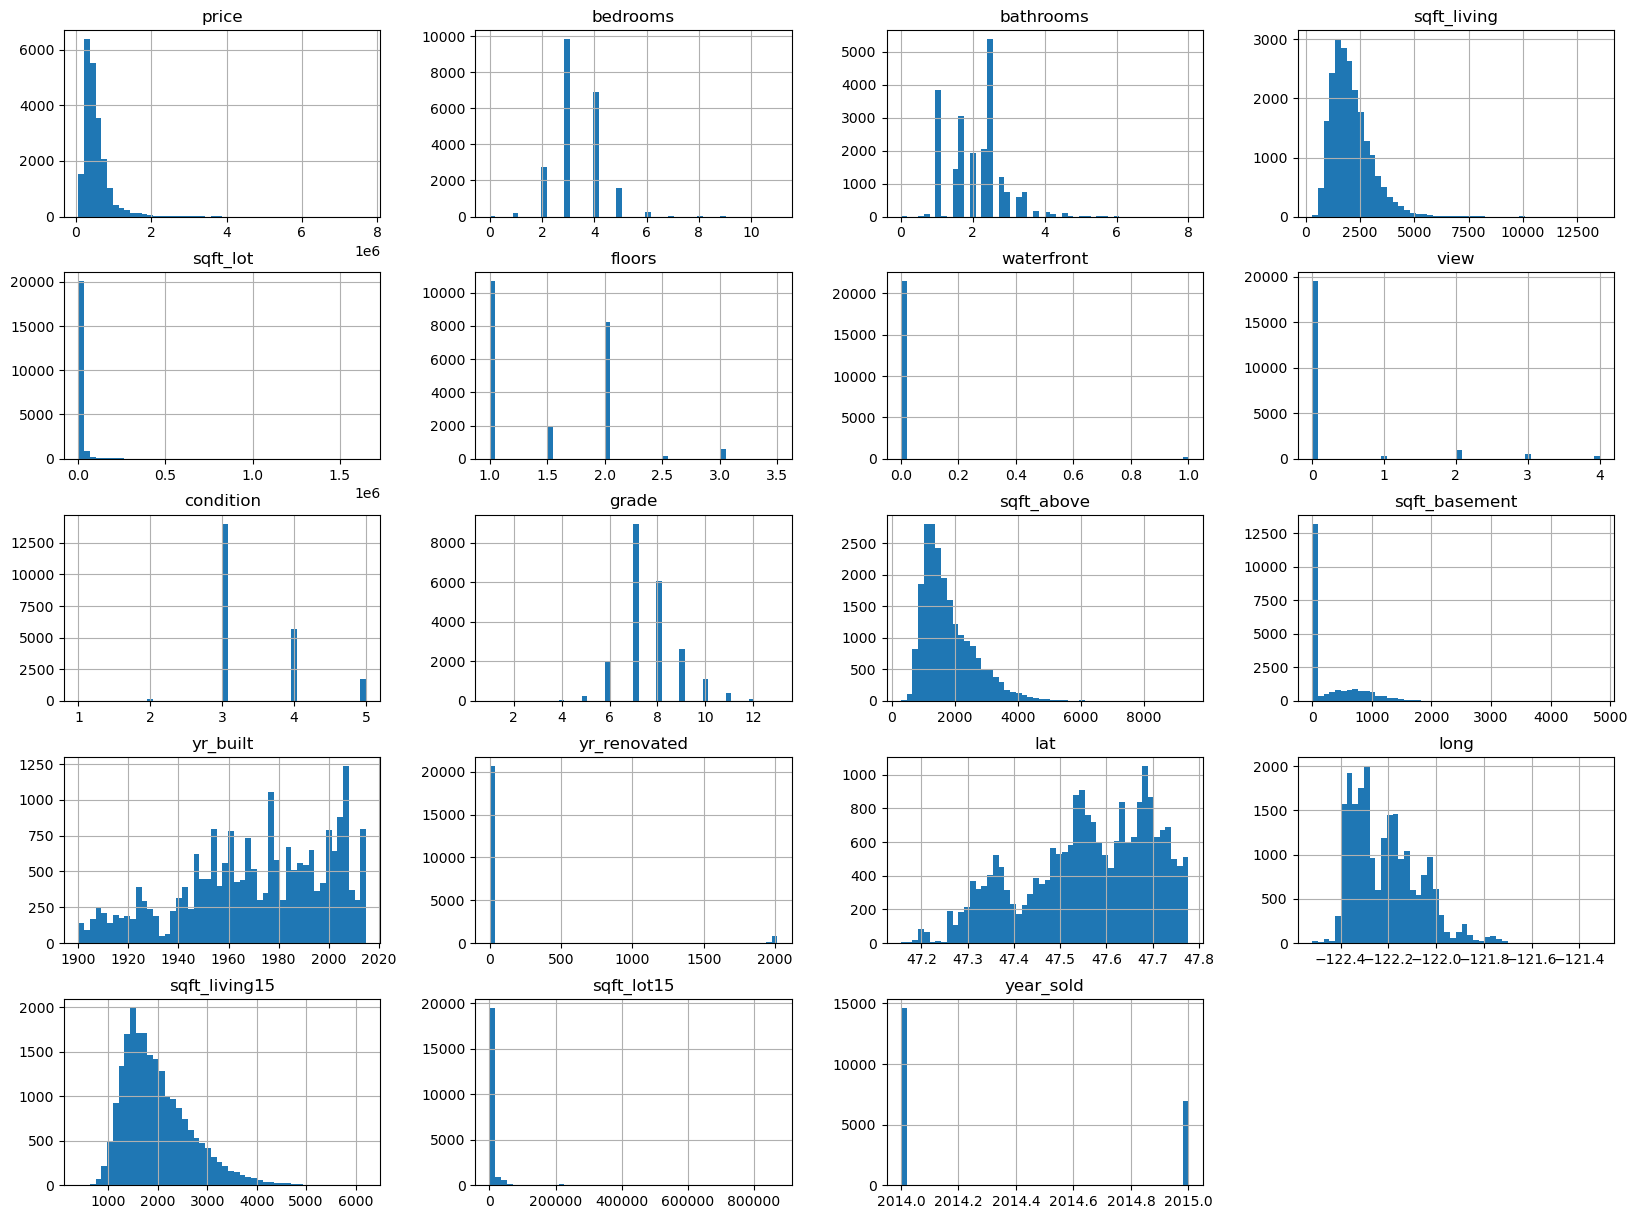

In [11]:
selected_cols = [x for x in dataset.columns if x not in ['id', 'date', 'zipcode']]
dataset[selected_cols].hist(bins=50, figsize=(20,15));

Vamos a realizar un mapa de calor de la matriz de correlación para analizar el grado de correlación que tienen las variables entre si:

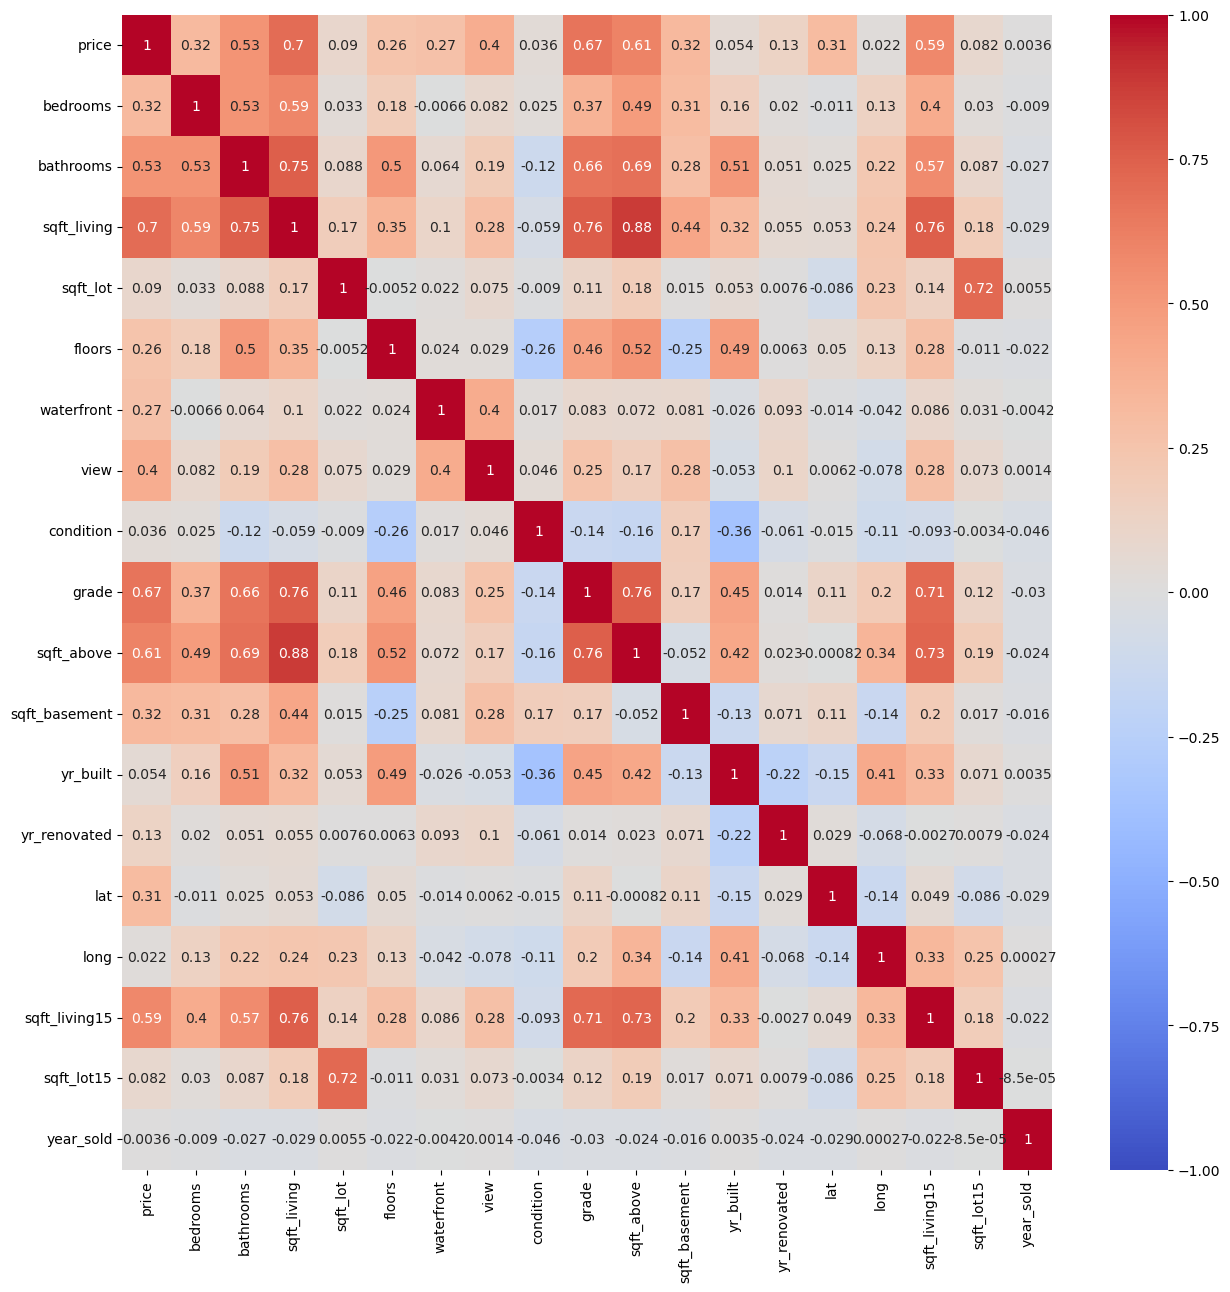

In [12]:
mat_corr = dataset.drop(['date', 'id', 'zipcode'], axis=1).corr()

plt.figure(figsize=(15,15))
sns.heatmap(mat_corr, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm');

Veamos directamente la correlación de la variable objetivo con todas las demás features:

In [13]:
corr_matrix = dataset.corr()
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.315438
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
year_sold        0.003576
date            -0.004357
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

La variable que mayor correlación tiene con nuestro target es el `sqft_living`.

Vamos a graficar un scatter plot con una regresión lineal:

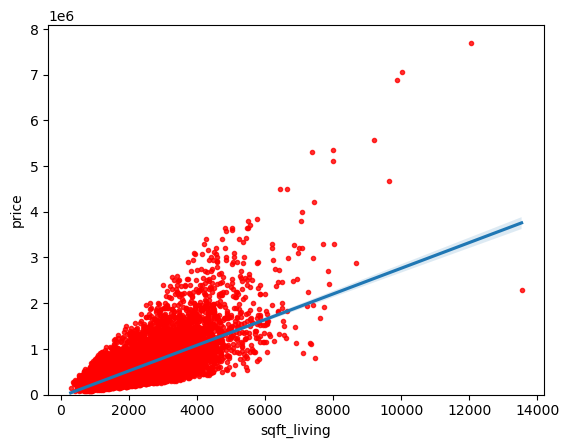

In [14]:
sns.regplot(
    data=dataset,
    x='sqft_living', 
    y=dataset['price'],
    order=1, 
    scatter_kws={'color':'r', 's':9}
)

plt.ylim(bottom=0);

El `pairplot` genera un grid de scatter plots entre todas las variables. En la diagonal, se plotean histogramas de las variable. Si pasamos una variable (generalmente categórica) en el argumento `hue`, va a separar por colores a las diferentes catergorías. 

En el caso que tengamos una variable objetivo y solamente nos interesen las interacciones de las $features$ con esta variable, podemos indicarle a la función `sns.pairplot()` cuál es la (o las)  variable objetivo con el argumento `y_vars` y cuáles son las *features* con `x_vars`. 

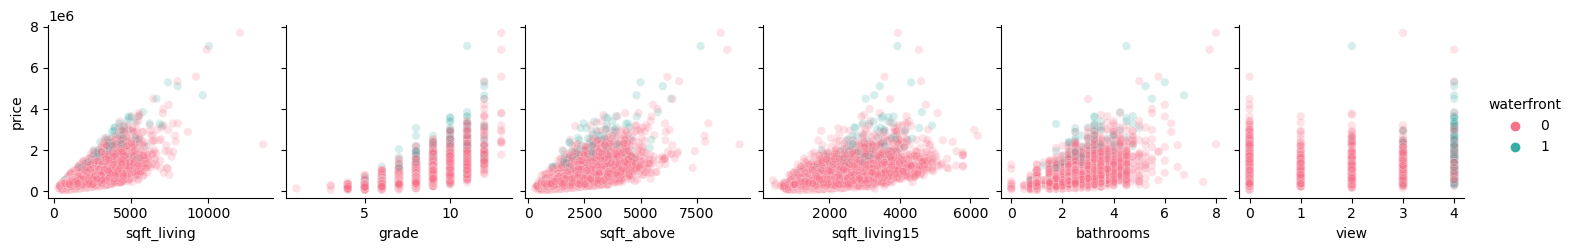

In [15]:
sns.pairplot(
    dataset, 
    x_vars=['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view'],
    y_vars='price', 
    hue='waterfront', 
    palette="husl", 
    plot_kws={"alpha":0.2}
);


### 2) Machine Learning con Scikit-Learn

**Scikit-Learn** es un paquete que provee implementaciones eficientes de un gran número de los algoritmos de machine learning. 

A continuación, vamos a ver un ejemplo de aplicación de aprendizaje supervisado.

#### 2.1) Regresión Lineal simple

Uno de los modelos más simples de modelo de machine learning es el caso de la **regresión lineal**. Dentro de la regresión lineal, el caso más simple es el de la regresión lineal simple, es decir cuando solamente tenemos una variable explicativa $x$ y una variable objetivo $y$.

El aprendizaje estadístico, en este caso, consiste en **ajustar una recta a los datos**, ya que el modelo asume que hay una relación aproximadamente lineal entre $x$ e $y$, que podemos expresar matemáticamente como:

$$ y = \beta_0 + \beta_1 x + \epsilon. $$


Donde $\epsilon$ representa una variable aleatoria con valor esperado igual a $0$. 

Podemos visualizar esta relación en un gráfico muy simple:

<h3><center>Regresión Lineal Simple</center></h3>
<img src="img/lin_reg.png" width="350">


El ajuste se realiza estimando los valores de $\beta_0$ y $\beta_1$, es decir obteniendo los estimadores $\hat{\beta_0}$ y $\hat{\beta_1}$ que **minimicen el error entre la predicción del modelo**:

$$\hat{y} =\hat{\beta_0} + \hat{\beta_1} x$$

y el verdadero valor $y$. 


La estimación de los parámetros se obtiene entonces minimizando el **error cuadrático**:

$$ \sum_ {i = 1}^n(y_i- \hat{y}_i)^2 $$

Se minimiza el cuadrado de los errores por varios motivos:

- Al elevar al cuadrado, evitamos que los errores negativos y positivos se compensen.
- Al elevar al cuadrado, penalizamos más a los errores más grandes.
- El cuadrado del error es diferenciable, por lo que podemos obtener el mínimo en $\hat{\beta_0}$ y $\hat{\beta_1}$.


##### Importamos la clase del modelo de sklearn

En `Scikit-Learn`, cada clase de modelo se representa con una clase de Python.

La biblioteca está estructurada en módulos, de forma tal que cada clase o función se encuentre en un módulo específico que engloba clases o funciones de la misma familia.

Para importar la clase de regresión lineal, la importamos del módulo de modelos lineales de la siguiente manera:

In [16]:
from sklearn.linear_model import LinearRegression

##### Instanciamos la clase del modelo

Recordemos que **una clase de modelo** no es es lo mismo que el **objeto de modelo** que obtenemos al instanciar la clase. 

Al instanciar la clase vamos a tener que definir algunos argumentos, denominados **hiperparámetros** del modelo, que van a determinar sus características, es decir de qué manera el algoritmo va a aprender de los datos. Configuraciones diferentes de **hiperparámetros** pueden hacer que la performance de un algoritmo sea muy diferente.

En el caso de la regresión lineal, por ejemplo tenemos que definir si queremos que el modelo incluya una ordenada al origen o si queremos que normalice los datos. Vamos a ver que la definición de estos hiperparámetros es un parte fundamental del entrenamiento y la optimización de algoritmos de machine learning, a tal punto que tiene un nombre específico: **optimización de hiperparámetros**. Vamos a profundizar sobre esto más adelante.  

Como de costumbre, las clases vienen con valores por default, por lo que si, al momento de instanciar no especificamos nada, vamos a estar implicitamente pasando los valores por default. 

Vamos a crear nuestro modelo como un objeto de la clase `LinearRegression`. Vamos a pedirle que también estime un intercepto. 

In [17]:
model = LinearRegression(fit_intercept=True)
type(model)

sklearn.linear_model._base.LinearRegression

Hasta ahora, solamente elegimos el modelo que vamos a entrenar y creamos un objeto con determinadas características. Todavía el modelo no vio los datos y por lo tanto no aprendió nada de ellos. Lo único que hicimos fue definir el modelo con sus hiperparámetros. 

##### Preparamos los datos 

Para poder hacer el ajuste de los datos, `Scikit-Learn` requiere que los datos de entrada sean representados como **una matriz de _features_ y un vector _target_**.

La matriz de *features* puede ser un array 2D de `Numpy` o un `DataFrame` de `Pandas`, mientras que el vector objetivo puede ser un array 1D de `Numpy` o una `Series` de Pandas.

A continuación, creamos la matriz de *features*, a la que llamaremos $X$, y el vector *target* $y$.

Para la regresión lineal simple vamos a usar a 'sqft_living' como *feature*, ya que es la que registra mayor correlación con el *target*:

In [18]:
# Creamos X e y:
features_cols = ['sqft_living']
# Es importante que la matriz X tenga 2 dimensiones aunque tenga una sola variable.
# De ser un objeto de Pandas, tiene que ser un DataFrame. De ser un objeto de Numpy,
# tiene que ser un array 2D.

X = dataset[features_cols]
y = dataset['price']

# Verificamos el shape y el tipo de X e y:
print("Shape X:", X.shape)
print("Type X:", type(X))
print("Shape y:", y.shape)
print("Type y:", type(y))

Shape X: (21613, 1)
Type X: <class 'pandas.core.frame.DataFrame'>
Shape y: (21613,)
Type y: <class 'pandas.core.series.Series'>


##### Train-test split

Nuestro interés por desarrollar el modelo es poder realizar **buenas predicciones sobre datos nuevos**. Es decir, queremos que el modelo performe bien no solamente con los datos que estamos usando para entrenar, sino también con datos que no vio previamente. Decimos que queremos que el modelo **generalice** bien. De nada nos sirve un modelo que predice perfectamente los datos de entrenamiento y luego tiene mala performance cuando lo usamos para hacer predicciones sobre nuevos datos.

Este punto es central en la **metodología de machine learning**. ¿Cómo podemos evaluar la capacidad de generalización del modelo? ¿Cómo podemos estimar la capacidad del modelo de hacer buenas predicciones con datos que no ha visto nunca?

Para poder lograr evaluar esto, necesitamos datos para los cuales sepamos la respuesta (tengamos la *label*), pero no hayamos usado para entrenar el modelo. Para lograr esto, vamos a dividir los datos en un *training set* y un *test set*.

Entrenaremos el modelo con los datos del *training set* y estimaremos su performance en el *test set*. 

`Scikit-Learn` nos provee con una función para realizar esta partición de los datos, la función `train_test_split()`:

In [19]:
from sklearn.model_selection import train_test_split
rs = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)

In [20]:
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (15129, 1)
y_train.shape:  (15129,)
X_test.shape:  (6484, 1)
y_test.shape:  (6484,)


##### Ajustamos el modelo a los datos de entrenamiento

Una vez obtenidos los sets te entrenamiento y testeo, estamos listos para que el modelo aprenda a partir de los datos de entrenamiento.

Hacemos esto el método `fit()`:

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [22]:
model.intercept_

-31356.78457486129

In [23]:
model.score(X_train, y_train)

0.4868437737212291

El método `fit()` realiza el ajuste de los datos. Las operaciones que realiza el método dependerá del modelo que estemos entrenando y los hiperparámetros que hayamos seleccionado al instanciar el objeto. 

En `Scikit-learn`, por convención, todos los atributos que representan los parámetros de los modelos que fueron aprendidos durante el proceso de entrenamiento con `fit()` se identifican por tener guiones bajo (*underscores*) luego de sus nombres.

Por ejemplo, en este modelo lineal, podemos verificar los valores de $\hat{\beta_0}$ y $\hat{\beta_1}$ aprendidos inspeccionando los atributos `intercept_` y `coef_`, respectivamente:

In [24]:
print('beta0: ', model.intercept_)
print('beta1: ', model.coef_)

beta0:  -31356.78457486129
beta1:  [273.80839877]


El método `predict()` utiliza el modelo entrenado para realizar predicciones. Toma como argumento una matriz de *features*. 

Vamos a hacer un `predict()` pasando los datos de testeo. El resultado serán las predicciones del modelo para cada uno de los datos del set de testeo: 

In [25]:
y_pred = model.predict(X_test)
y_pred.shape

(6484,)

#####  Evaluamos la *performance* del modelo

Por último, vamos a  evaluar el desempeño del modelo comparando las predicciones con los valores reales. A continuación, presentamos algunas de las métricas más utilizadas para la evaluación de un modelo de regresión:

El **error absoluto medio** (_Mean Absolut Error_ o MAE) es la media del valor absoluto de los errores:

$$ \frac 1n\sum_ {i = 1}^n |y_i-\hat{y}_i| $$

El **error cuadrático medio** (_Mean Squared Error_ o MSE) es la media de los errores al cuadrado:

$$ \frac 1n\sum_ {i = 1}^n(y_i- \hat{y}_i)^2 $$

El **error cuadrático medio raíz** (_Root Mean Squared Error_ o RMSE) es la raíz cuadrada de la media de los errores al cuadrado:

$$ \sqrt{\frac 1n\sum_{i = 1}^n(y_i- \hat{y}_i)^2} $$

El **$R^2$** es la proporción de la varianza total de $y$ explicada por el modelo.

$$ R^2 = \frac{TSS-RSS}{TSS} = 1 -  \frac{RSS}{TSS}$$

donde:

$$ TSS = \sum_{i = 1}^n(y_i- \bar{y})^2 $$
$$ RSS = \sum_{i = 1}^n(y_i- \hat{y}_i)^2 $$

*TSS* es el *total sum of squares* y *RSS* el *residual sum of squares*.

Comparando estas métricas:

- _MAE_ es el error promedio.
- _MSE_ "penaliza" errores grandes, de ahí que eleve los valores al cuadrado.
- _RMSE_ es comparable con la variable objetivo, ya que tiene las mismas unidades que la $y$.
- _$R^2$_ es la proporción de la varianza total de $y$ explicada por el modelo
        

Con excepción del $R^2$, todas éstas son **funciones de pérdida**, porque queremos **minimizarlas**. El $R^2$, por su parte, cuanto más próximo a 1 se encuentre, mejor.

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def print_metrics(y, y_pred):
    print ('MAE:', mean_absolute_error(y, y_pred).round(2))
    print ('MSE:', mean_squared_error(y, y_pred).round(2))
    print ('RMSE:', np.sqrt(mean_squared_error(y, y_pred)).round(2))
    print ('R2:', r2_score(y, y_pred).round(4))

In [27]:
print_metrics(y_test, y_pred)

MAE: 175221.7
MSE: 77554859321.62
RMSE: 278486.73
R2: 0.5031


Vemos que el modelo performa no performa particularmente bien. Un $R^2$ de 0.5031 no es un gran resultado. 

El interrogante que podría surgir ahora es si el modelo no está pudiendo ajustar bien a los datos de entrenamiento, es decir que al modelo le falta capacidad de aprender de los datos, o si por el contrario, el modelo tiene un problema de generalización, es decir que predice mal solamente los datos nuevos. 

Para evaluar esto, nos va a servir evaluar la métricas de performance en el set de entrenamiento:

In [28]:
y_pred_train = model.predict(X_train)

print_metrics(y_train, y_pred_train)


MAE: 171362.02
MSE: 64468217051.84
RMSE: 253905.92
R2: 0.4868


Vemos que el modelo ajusta de forma similar también en el set de entrenamiento, con un $R^2$ de 0.4868.

Podemos concluir que al modelo le falta capacidad de ajuste, es decir potencia para predecir a la variable objetivo. En el dataset tenemos otras variables que podemos incluir al modelo. Cuando pasamos de tener una sola *feature* a tener múltiples *features*, tenemos un modelo de **regresión lineal múltiple**

#### 2.2) Regresión lineal múltiple

Instanciamos otro modelo que vamos a usar para entrenar la regresión lineal múltiple. 

In [29]:
model_mult = LinearRegression(fit_intercept=True)
model_mult

LinearRegression()

Creamos nuestra matriz de *features* y nuestro vector *target*.  

En las *features*, vamos a incluir todas las variables, menos 'id' y 'zipcode' que son códigos, y la fecha. Obviamente, vamos a eliminar de nuestra matriz de features también a la variable objetivo.

In [30]:
dataset.shape

(21613, 22)

In [31]:
# Creamos X e y
features_cols = [x for x in dataset.columns if x not in ['price','id', 'date','zipcode']]
X_rm = dataset[features_cols]
y_rm = dataset['price']

# Verificamos el shape y el tipo de X e y:
print("Shape X_rm:", X_rm.shape)
print("Type X_rm:", type(X_rm))
print("Shape y_rm:", y_rm.shape)
print("Type y_rm:", type(y_rm))

Shape X_rm: (21613, 18)
Type X_rm: <class 'pandas.core.frame.DataFrame'>
Shape y_rm: (21613,)
Type y_rm: <class 'pandas.core.series.Series'>


Corroboremos cuáles son las *features* que quedaron en nuestra matriz X_rm:

In [32]:
X_rm.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_sold'],
      dtype='object')

In [33]:
X_rm.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
year_sold          int32
dtype: object

Volvemos a hacer el split:

In [35]:
X_rm_train, X_rm_test, y_rm_train, y_rm_test = train_test_split(X_rm, y_rm, test_size=0.3, random_state=rs)

In [36]:
X_rm.shape[0], X_rm_train.shape[0], X_rm_test.shape[0]

(21613, 15129, 6484)

Antes de avanzar, recordemos que tenemos que imputar el valor de los baños y habitaciones para las casas que vienen con valor 0.

Primero vamos a reemplazar como valor nulo todos los valores igual a cero en las variables baños y habitaciones. 

In [37]:
X_rm_train['bedrooms'].replace(0, np.nan, inplace=True)
X_rm_train['bathrooms'].replace(0, np.nan, inplace=True)
X_rm_test['bedrooms'].replace(0, np.nan, inplace=True)
X_rm_test['bathrooms'].replace(0, np.nan, inplace=True)

In [38]:
X_rm_train.shape

(15129, 18)

Implementamos el fillna, prestando atención de utilizar *X_rm_train* tanto para imputar en el set de testeo como de entrenamiento. 

In [39]:
X_rm_train.fillna(X_rm_train.groupby('floors').transform('median'), inplace=True)

In [40]:
dicc_bed = X_rm_train.groupby('floors')['bedrooms'].median().apply(np.ceil).to_dict()
dicc_bath = X_rm_train.groupby('floors')['bathrooms'].median().apply(np.ceil).to_dict()

In [41]:
dicc_bed

{1.0: 3.0, 1.5: 3.0, 2.0: 4.0, 2.5: 4.0, 3.0: 3.0, 3.5: 3.0}

In [42]:
dicc_bath

{1.0: 2.0, 1.5: 2.0, 2.0: 3.0, 2.5: 3.0, 3.0: 3.0, 3.5: 3.0}

In [43]:
X_rm_test['bedrooms'] = X_rm_test['bedrooms'].fillna(X_rm_test['floors'].map(dicc_bed))

X_rm_test['bathrooms'] = X_rm_test['bathrooms'].fillna(X_rm_test['floors'].map(dicc_bath))

Entrenamos el modelo:

In [44]:
model_mult.fit(X_rm_train, y_rm_train)

LinearRegression()

Verificamos los parámetros estimados:

In [45]:
print('intercept: ', model_mult.intercept_)
print('betas: ', model_mult.coef_)

intercept:  -93315083.01916887
betas:  [-3.52768554e+04  4.08034535e+04  1.06644676e+02  8.88859831e-02
  4.25744373e+03  5.68468889e+05  4.75672233e+04  3.21336220e+04
  9.60349725e+04  7.04627478e+01  3.61819278e+01 -2.40338682e+03
  2.38804385e+01  5.75592199e+05 -1.12081183e+05  2.48514150e+01
 -3.29503359e-01  2.79381603e+04]


Calculamos las predicciónes del modelo en el set de testeo y las métricas correspondientes:


In [48]:
y_pred = model_mult.predict(X_rm_test)

print_metrics(y_rm_test, y_pred)

MAE: 128729.9
MSE: 48723555371.66
RMSE: 220734.13
R2: 0.6878


Calculamos las predicciónes del modelo en el set de entrenamiento y las métricas correspondientes:

In [49]:
y_pred_train = model_mult.predict(X_rm_train)

print_metrics(y_rm_train, y_pred_train)


MAE: 122760.39
MSE: 37467101858.54
RMSE: 193564.21
R2: 0.7018



Vemos que la performance es mejor tanto para el set de entrenamiento como de testeo. Observamos además que la performance es similar para el set de entrenamiento y de testeo

En la clase que viene vamos a intentar mejorar estos resultados y ver qué pasa cuando el modelo sobreajusta a los datos del set de entrenamiento. 




